# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

import tensorflow as tf
np.random.seed(23)


# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.


# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape

# TODO: how many classes are in the dataset
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


#### Class 5 ####


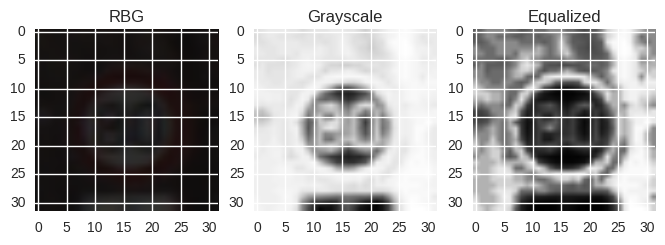

#### Class 19 ####


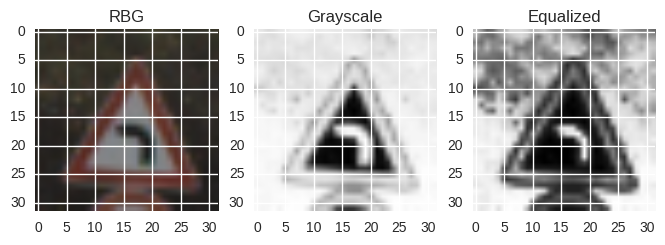

#### Class 7 ####


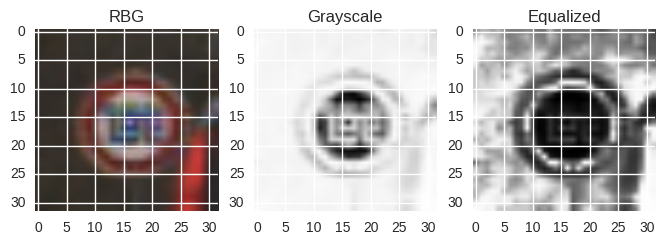

#### Class 5 ####


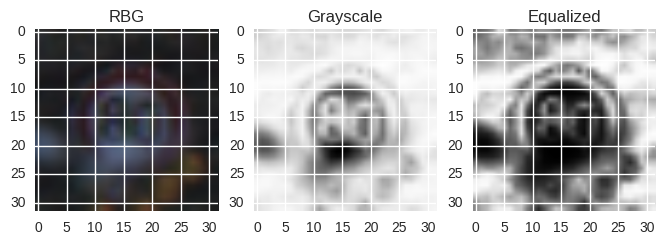

#### Class 4 ####


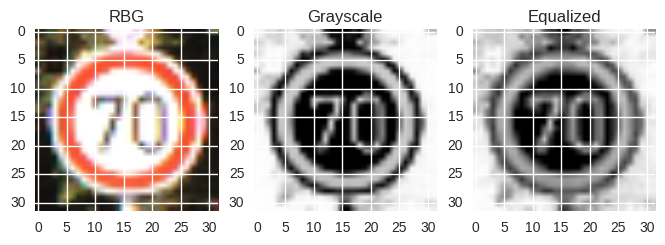

In [3]:
def plt_img(image):
    """ Helper for plotting images """
    fig = plt.figure(figsize=(8,24))
    a=fig.add_subplot(1,3,1)
    a.title.set_text('RBG')
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    a=fig.add_subplot(1,3,2)
    a.title.set_text('Grayscale')
    plt.imshow(image)
    image = cv2.equalizeHist(image)
    a=fig.add_subplot(1,3,3)
    a.title.set_text('Equalized')
    plt.imshow(image)
    plt.show()

random_images = np.random.randint(0, n_train, 5)
for i in random_images:
    print("#### Class {} ####".format(y_train[i]))
    plt_img(X_train[i])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
def preprocess(data):
    """Convert to grayscale, histogram equalize, and expand dims"""
    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    return imgs

X_train = preprocess(X_train)
X_test = preprocess(X_test)

def center_normaize(data, mean, std):
    """Center normalize images"""
    data = data.astype('float32')
    data -= mean
    data /= std
    return data

mean = np.mean(X_train)
std = np.std(X_train)

X_train = center_normaize(X_train, mean, std)
X_test = center_normaize(X_test, mean, std)


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

- Grayscale Conversion. Grayscale conversion reduces the number of features to learn, improving efficency. 
- Histogram Equalization: Histogram equalization helps balance the features between images, which helps prevents brightness and contrast from influencing learning.  
- Center and Normalize: Centering subtracts the mean pixel value across the entire training set, then divides by the standard deviation. This results in a dataset that has a mean of 0 and variance of 1, which is known to improve the performance of neural networks. 

In [5]:
## One Hot Encode Labels
ohe = LabelBinarizer().fit(y_train)
y_train_ohe = ohe.transform(y_train)
y_test_ohe = ohe.transform(y_test)

## Split off 20% for validation
_, X_valid, _, y_valid_ohe = train_test_split(X_train, y_train_ohe, test_size=0.2, random_state=23, stratify=y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

The data is already split into training/test sets, which are used in their basic form to train the model. Although the labels are not perfectly balanced, I did not find it necessary to generate additional data because there are sufficient samples for each class train the model. The only significant change was to one-hot-encode the labels, which is required for the categorical crossentropy in TensorFlow. 

I also used a stratified validation set (with replacement) to evaluate the the training accuracy after each epoch. This step helps provide a balanced evaluation of model performance and overfitting versus the test data. 

In [53]:
# HyperParameters
learning_rate = 0.0005
batch_size = 256
training_epochs = 100
n_classes = 43
dropout_prob = 0.5

layer_width = {
    'layer_1': 64,
    'layer_2': 128,
    'layer_3': 256,
    'layer_4': 256,
    'dense_1': 400,
    'dense_2': 200
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [3, 3, 1, layer_width['layer_1']], stddev=0.001)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [3, 3, layer_width['layer_1'], layer_width['layer_2']], stddev=0.001)),
    'layer_3': tf.Variable(tf.truncated_normal(
        [3, 3, layer_width['layer_2'], layer_width['layer_3']], stddev=0.001)),
    'layer_4': tf.Variable(tf.truncated_normal(
        [3, 3, layer_width['layer_3'], layer_width['layer_4']], stddev=0.001)),
    'dense_1': tf.Variable(tf.truncated_normal(
        [4*4*256, layer_width['dense_1']], stddev=0.001)),
    'dense_2': tf.Variable(tf.truncated_normal(
        [layer_width['dense_1'], layer_width['dense_2']], stddev=0.001)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['dense_2'], n_classes], stddev=0.001))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    'dense_1': tf.Variable(tf.zeros(layer_width['dense_1'])),
    'dense_2': tf.Variable(tf.zeros(layer_width['dense_2'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def conv_net(x, weights, biases, dropout):
    
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    conv4 = maxpool2d(conv4)

    fc1 = tf.reshape(conv4, [-1, weights['dense_1'].get_shape().as_list()[0]])
    
    fc1 = tf.add(tf.matmul(fc1, weights['dense_1']), biases['dense_1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout_prob)
    
    fc2 = tf.add(tf.matmul(fc1, weights['dense_2']), biases['dense_2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout_prob)
    
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return out

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final model is a convolutional neural network that is similer to the VGG-style architectures in the following paper: https://arxiv.org/abs/1409.1556

The traffic sign dataset is much smaller than the imagenet benchmark used for VGG, so the the number of layers and neurons have been scaled down. The final model contains four convolutional layers and two fully connected layers, each with 50% dropout. 

### Summary of Model Layers

Below is a summary of the model and the shape of its layers. 

- Input: (32, 32, 1)
- Conv:  (32, 32, 64)
- Pool:  (16, 16, 64)

- Conv:  (16, 16, 128)
- Pool:  (8, 8, 128)

- Conv:  (8, 8, 256)
- Conv:  (8, 8, 256)
- Pool:  (4, 4, 256)

- Flatten: (2048)

- FullyConnected: (400)
- Dropout 0.5

- FullyConnected: (200)
- Dropout 0.5

- Output: (43)



In [54]:
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Save model for evaluation
saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    for epoch in range(training_epochs):
        total_batch = int(n_train/batch_size)
        
        # shuffle data index for each epoch
        rand_idx = np.random.permutation(n_train)

        for i in range(total_batch):
            offset = i*batch_size
            off_end = offset+batch_size
            batch_idx = rand_idx[offset:off_end]
            
            batch_x = X_train[batch_idx]
            batch_y = y_train_ohe[batch_idx]

            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_prob})
        
        cost_tr, acc_tr = sess.run([cost, accuracy], feed_dict={x: X_valid, y: y_valid_ohe, keep_prob: 1.})
        cost_ts, acc_ts = sess.run([cost, accuracy], feed_dict={x: X_test, y: y_test_ohe, keep_prob: 1.})
        print("#### Epoch {} ####".format(epoch+1))
        print("Train Cost: {:.5f}  | Train Accuracy: {:.5f}".format(cost_tr, acc_tr))
        print("Test Cost:  {:.5f}  | Test Accuracy:  {:.5f}".format(cost_ts, acc_ts))
    
    save_path = saver.save(sess, "models/model.ckpt")
    print("Training Complete! Model saved in file: %s" % save_path)
        

#### Epoch 1 ####
Train Cost: 3.47538  | Train Accuracy: 0.05700
Test Cost:  3.45276  | Test Accuracy:  0.05859
#### Epoch 2 ####
Train Cost: 2.76601  | Train Accuracy: 0.16743
Test Cost:  2.74817  | Test Accuracy:  0.17696
#### Epoch 3 ####
Train Cost: 2.03897  | Train Accuracy: 0.34111
Test Cost:  2.07736  | Test Accuracy:  0.33183
#### Epoch 4 ####
Train Cost: 1.66712  | Train Accuracy: 0.43815
Test Cost:  1.73232  | Test Accuracy:  0.43761
#### Epoch 5 ####
Train Cost: 1.41474  | Train Accuracy: 0.52079
Test Cost:  1.49836  | Test Accuracy:  0.50752
#### Epoch 6 ####
Train Cost: 1.14835  | Train Accuracy: 0.61655
Test Cost:  1.25325  | Test Accuracy:  0.60087
#### Epoch 7 ####
Train Cost: 0.91436  | Train Accuracy: 0.70594
Test Cost:  1.06263  | Test Accuracy:  0.67743
#### Epoch 8 ####
Train Cost: 0.73438  | Train Accuracy: 0.76447
Test Cost:  0.90699  | Test Accuracy:  0.72874
#### Epoch 9 ####
Train Cost: 0.59942  | Train Accuracy: 0.80860
Test Cost:  0.78045  | Test Accuracy:  

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Optimizer: I chose the Adam algorithm optimizer over simple gradient descent. Adam uses the moving averages or momentum of the parameters for make steps, allowing it to find local minima more efficiently. In other words, it allows larger gradient descent steps to be taken if the momentum is trending in a certain direction. 

Batch Size and Epochs: Various combinations of batch size and epochs lead to acceptable results. Larger batch sizes require more epochs to train, but usually compute a better gradient.  At the very least, batch sizes should larger than the 43 class labels in this dataset.  Also, I randomly shuffled the training data a each epoch to prevent overfitting. A combination of 100 epochs at a batch size of 256 was the final choice for this model. 

Hyper Parameters: A learning rate of 0.0005 was optimal for the Adam optimizer and batch size. A higher learning rate lead to overfitting, while a smaller learning rate failed to converge. The only other hyperparameter is the dropout probability, which as 0.5. This means that an input element has a 50% chance of being activated when forward propagating. 

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I approached this problem by modeling the neural net on the most successful image classifiers, most notably the VGG-style convnets.  This problem is similar to MNIST in many ways, so I used existing models as inspiration of this problem. I also experimented with various combinations of hyperparameters, normalization, and layer configurations.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

extra-images/sign1.jpg


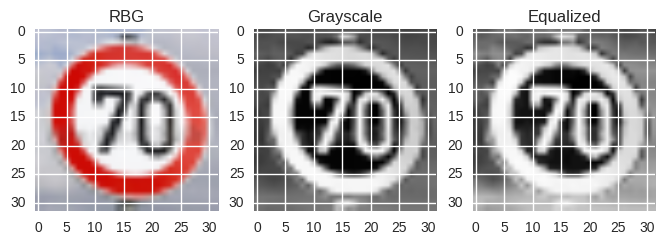

extra-images/sign2.jpg


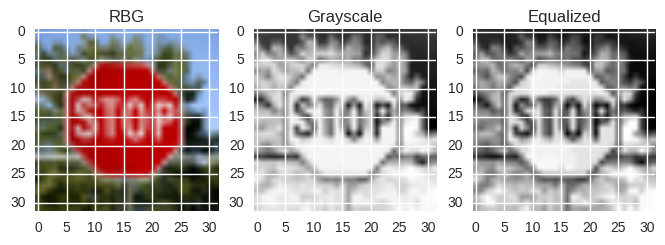

extra-images/sign3.jpg


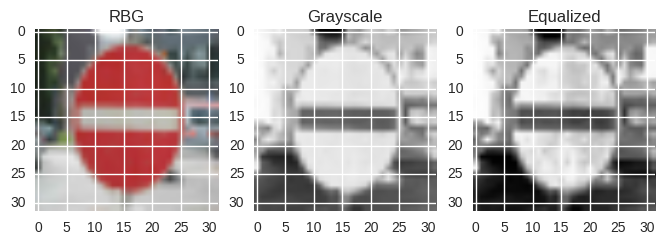

extra-images/sign4.jpg


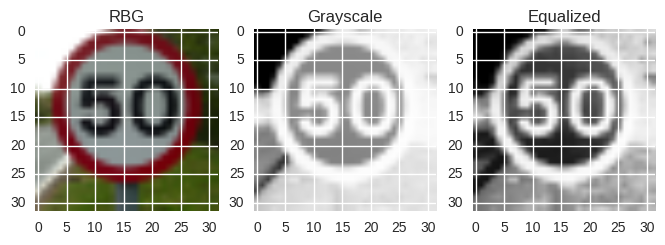

extra-images/sign5.jpg


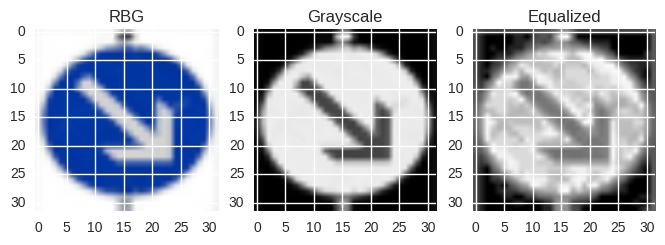

extra-images/sign6.jpg


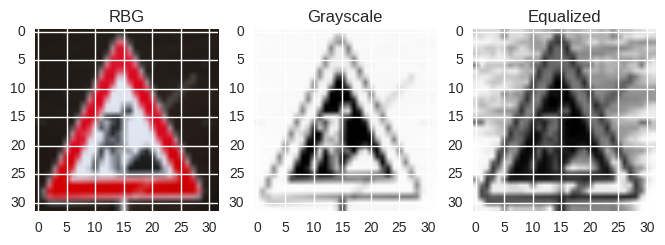

In [55]:
### Load the images and plot them here.
import os
image_dir = 'extra-images/'
new_images = [image_dir+i for i in os.listdir(image_dir)]
new_images = sorted(new_images, key=lambda x: x.split('.')[0])

def read_img(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    img = img[:,:,::-1]
    return cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

for img in new_images:
    print(img)
    img  = read_img(img)
    plt_img(img)

# labels for new images
y_new = np.array([4,14,17,2,38,25])

X_new = np.ndarray((6, 32, 32, 3), dtype=np.uint8)
for i, img in enumerate(new_images):
    img = read_img(img)
    X_new[i] = img

X_new = preprocess(X_new)
X_new = center_normaize(X_new, mean, std)
y_new_ohe = ohe.transform(y_new)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

See images plotted above. They are similar to the the training images, but there is more noise in the background. Also, the original images are not perfectly square, which causes some distortion when resizing to 32x32. 

In [56]:
pr = tf.argmax(logits, 1)
tk = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess, "models/model.ckpt")
    c, acc, top_k, preds = sess.run([cost, accuracy, tk, pr], feed_dict={x: X_new, y: y_new_ohe, keep_prob: 1.})
    
    print("Cost:  {:.5f}  | New Image Accuracy:  {:.5f}".format(c, acc))

Cost:  1.90829  | New Image Accuracy:  0.83333


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The model accuracy on the new images is 83%, or 5 out 6 correct predictions. This performance is worse than the provided dataset, but 6 images is a very small sample. I am confident that a larger dataset would give comparable results to the testing data. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


extra-images/sign1.jpg
Predicted Class: 4 | True Class: 4


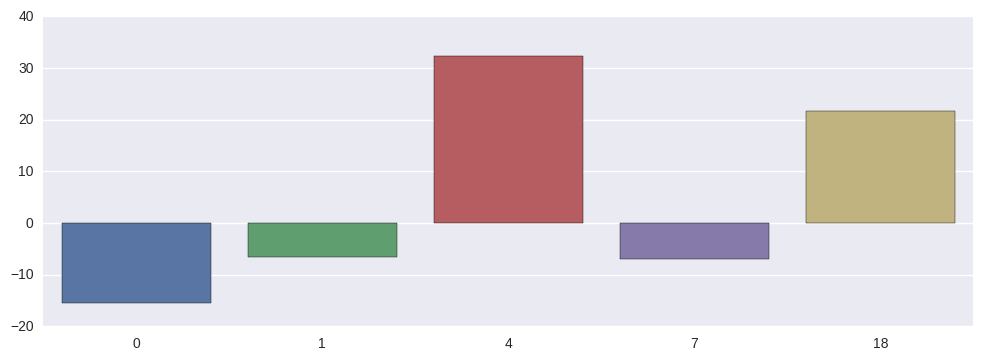

extra-images/sign2.jpg
Predicted Class: 14 | True Class: 14


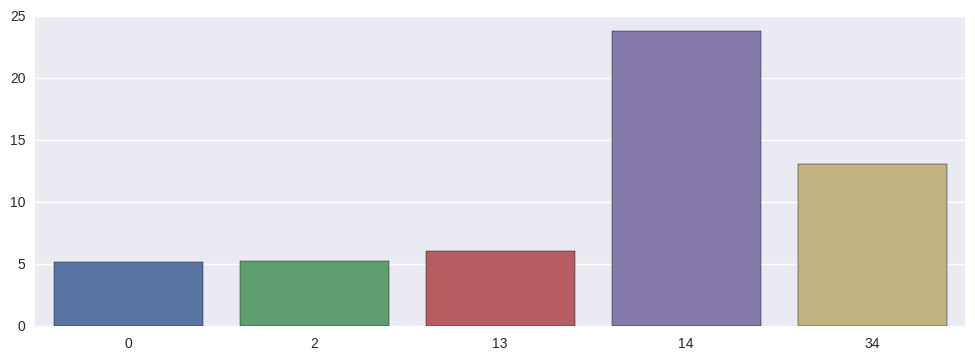

extra-images/sign3.jpg
Predicted Class: 17 | True Class: 17


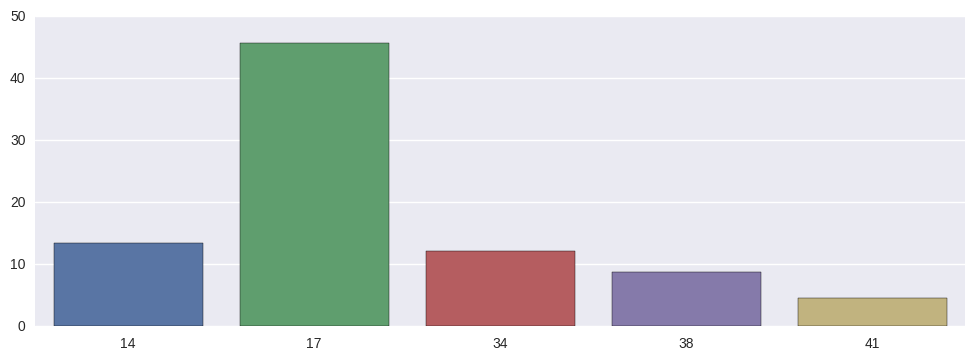

extra-images/sign4.jpg
Predicted Class: 10 | True Class: 2


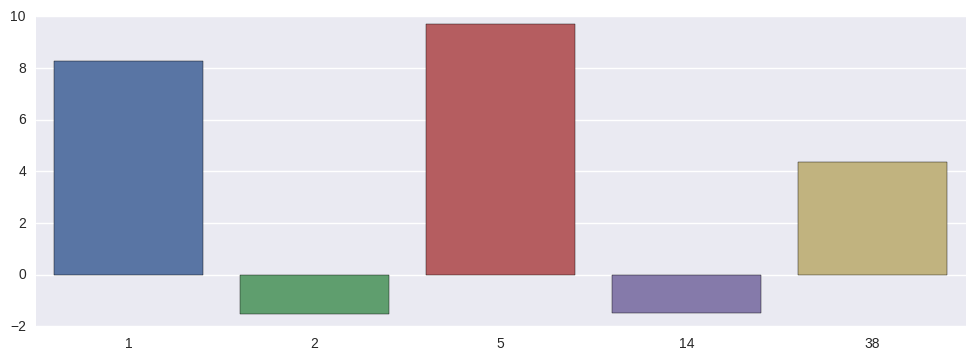

extra-images/sign5.jpg
Predicted Class: 38 | True Class: 38


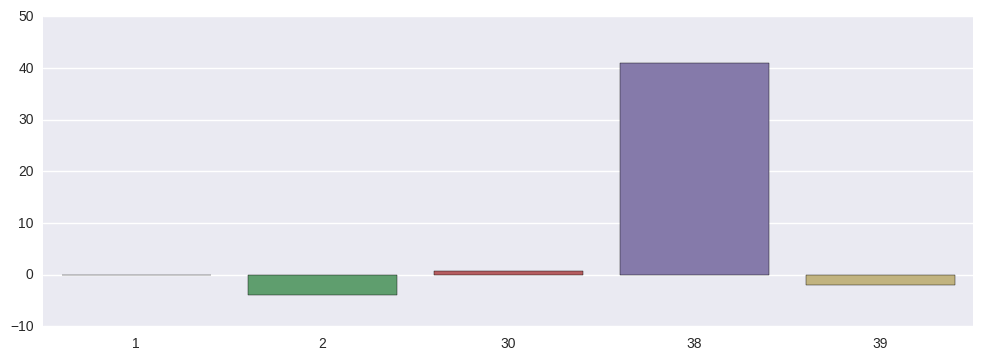

extra-images/sign6.jpg
Predicted Class: 25 | True Class: 25


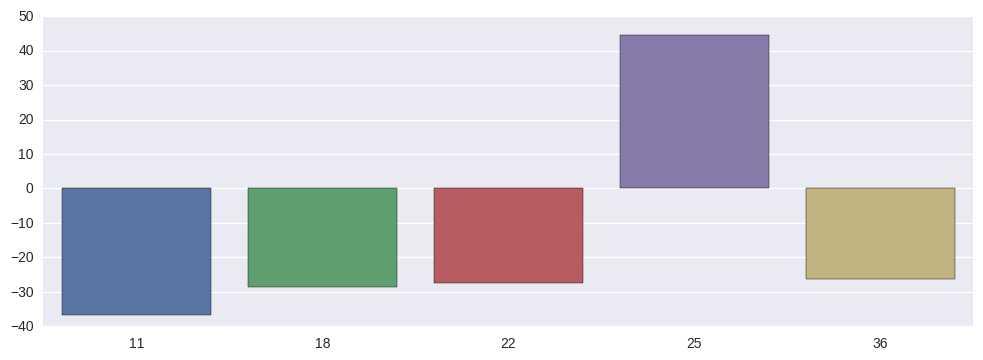

In [57]:
for i in range(6):
    print(new_images[i])
    print("Predicted Class: {} | True Class: {}".format(preds_class[i], y_new[i]))
    fig = plt.figure(figsize=(12,4))
    sns.barplot(x=top_k[1][i], y=top_k[0][i])
    plt.show()

**Answer:**

The only incorrect prediction is sign4.jpg, but correct class does rank within the top five logits. It appears the model has not learned the importance of the sign numbers for this partiqular class. 

The model was extremely confident for all other predictions, with the actual softmax probabilities approaching 1.0 for the correct class

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

- Save images to a directory of your choosing. 
- Iterate over images using `read_img` function. 
- Preprocess and normalize images with `preprocess` and `center_normalize`
- Start a new TensorFlow session and enjoy. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.